# Προγραμματιστική Εργασία Αριθμητικής Ανάλυσης

## Κωνσταντής Αθανάσιος // ΑΕΜ: 10537
## Χούκλης Αθανάσιος // ΑΕΜ: 10396

### Αρχικά ορίζουμε και αρχικοποιούμε μεταβλητές και διανύσματα που θα χρειαστούμε:

-Την μεταβλητή step που ορίζει το βήμα που θα χρησιμοποιεί η υλοποίηση της κλασσικής Runge-Kutta, για την οποία εμείς επιλέγουμε την τιμή 1.

-Τα διανύσματα yvector, evector και tvector, τα οποία θα περιέχουν τις προσεγγιστικές τιμές για τα ύποπτα, επιβεβαιωμένα και τελικά κρούσματα αντίστοιχα. Αργότερα θα έχουν 110 τιμές (t=0 έως 109). Αρχικά είναι άδεια.

-Το διάνυσμα dayslist, το οποίο περιέχει τον αριθμό καθεμιάς από τις 7 ημέρες για τις οποίες γνωρίζουμε τις πραγματικές τιμές ύποπτων και επιβεβαιωμένων κρουσμάτων.

-Τα διανύσματα ypoptalist και epivevaiwmenalist, τα οποία περιέχουν τις πραγματικές τιμές ύποπτων και επιβεβαιωμένων κρουσμάτων αντίστοιχα, για τις 7 ημέρες για τις οποίες τις γνωρίζουμε ακριβώς.

-Τα numpy arrays των τριών παραπάνω, τα οποιά θα χρησιμοποιηθούν για plotting.

Επιπλέον κάνουμε import τις απαραίτητες βιβλιοθήκες.

In [ ]:
from scipy.optimize import least_squares
import numpy as np 
from matplotlib import pyplot as plt 


step = 1
yvector = []
evector = []
tvector = []

dayslist = [0,16,31,47,62,78,109]
daysvector = np.array(dayslist)
ypoptalist = [235,201,153,121,108,97,83]
ypopta = np.array(ypoptalist)
epivevaiwmenalist = [14,22,29,21,8,8,0]
epivevaiwmena = np.array(epivevaiwmenalist)

### Έπειτα υλοποιούμε την μέθοδο Runge-Kutta 4ης τάξης σε κώδικα ως εξής:

Φτιάχνουμε συναρτήσεις που υπολογίζουν τις παραστάσεις (−αYE), (αYE − βE) και (βΕ), και στη συνέχεια κατασκευάζουμε την κύρια συνάρτηση, η οποία ακολουθεί την μεθοδολογία της κλασσικής Runge-Kutta για να δώσει τα κατάλληλα inputs στις παραπάνω συναρτήσεις ώστε να βρει τα απαραίτητα k, l και m, καθώς και την επόμενη τιμή Y, E και T για κάθε επανάληψη.

Εφόσον χρησιμοποιούμε step=1, η συνάρτηση χρειάζεται να κάνει 109 επαναλήψεις για να βρει όλες τις ζητούμενες τιμές. Όταν η συνάρτηση τελειώσει την διαδικασία της, τα διανύσματα yvector, evector και tvector έχουν πλέον αποκτήσει 110 τιμές το καθένα (τα αντίστοιχα t=0 έως t=109).

In [2]:
fun_y = lambda a,y,e : -a*y*e 
fun_e = lambda a,y,e,b: a*y*e-b*e
fun_t = lambda b,e : b*e

def RungeKutta(variables):
    yvector.clear()
    evector.clear()
    tvector.clear()
    yvector.append(235.0)
    evector.append(14.0)
    tvector.append(0.0)
    for i in range(0,109):
        k0 = step*fun_y(variables[0],yvector[i],evector[i])
        l0 = step*fun_e(variables[0],yvector[i],evector[i],variables[1])
        m0 = step*fun_t(variables[1],evector[i])
    
        k1 = step*fun_y(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0)) 
        l1 = step*fun_e(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0),variables[1])
        m1 = step*fun_t(variables[1],evector[i] + (l0/2.0))
    
        k2 = step*fun_y(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0)) 
        l2 = step*fun_e(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0),variables[1])
        m2 = step*fun_t(variables[1],evector[i] + (l1/2.0))
    
        k3 = step*fun_y(variables[0],yvector[i] + k2, evector[i] + l2) 
        l3 = step*fun_e(variables[0],yvector[i] + k2, evector[i] + l2,variables[1])
        m3 = step*fun_t(variables[1],evector[i] + l2)

        ynext = yvector[i] + (1/6.0) * (k0 + 2*k1 + 2*k2 + k3)
        enext = evector[i] + (1/6.0) * (l0 + 2*l1 + 2*l2 + l3)
        tnext = tvector[i] + (1/6.0) * (m0 + 2*m1 + 2*m2 + m3)
        yvector.append(ynext)
        evector.append(enext)
        tvector.append(tnext)

#### Για να μπορέσουμε να βελτιστοποιήσουμε τις προσεγγιστικές τιμές μας, θα χρειαστούμε μια συνάρτηση η οποία θα υπολογίζει και θα επιστρέφει τα σφάλματα (όσον αφορά τα Y και E, εφόσον μόνο για αυτά έχουμε πραγματικές τιμές) για κάθε ημέρα από τις 7, όλα μαζί σε ένα διάνυσμα.

In [3]:
def calculateErrorVector():
    errorvec = []
    errorvec.clear()
    k = 0
    for i in dayslist:
        errorvec.append(ypoptalist[k]-yvector[i])
        k+=1
    k = 0
    for i in dayslist:
        errorvec.append(epivevaiwmenalist[k]-evector[i])
        k += 1
    return errorvec

#### Για να ελαχιστοποιήσουμε τα σφάλματα (και έτσι να βελτιστοποιήσουμε τις προσεγγιστικές τιμές), χρησιμοποιούμε την least_squares της scipy.optimize.

Της δίνουμε ως πρώτο όρισμα τα σφάλματα σε διάνυσμα και ως δεύτερο όρισμα το initial guess μας των παραμέτρων α και β μαζί σε ένα διάνυσμα.

Μετά από κάποιο manual trial & error, βρήκαμε ότι οι τιμές α=0.00057 και β=0.0905 είναι καλό σημείο εκκίνησης για τον αλγόριθμο.

Αυτό μπορεί να φανεί και από τα παρακάτω interactive διαγράμματα, τα οποία δείχνουν πώς μεταβάλλεται η προσέγγιση μας όταν μεταβάλλονται τα α και β εντός κάποιων ορίων.

Για να μπορέσετε να αλληλεπιδράσετε με αυτά, θα χρειαστεί να κάνετε ένα "restart the kernel, then rerun the whole notebook (with dialog)".

## Skataki]

<IPython.core.display.Javascript object>


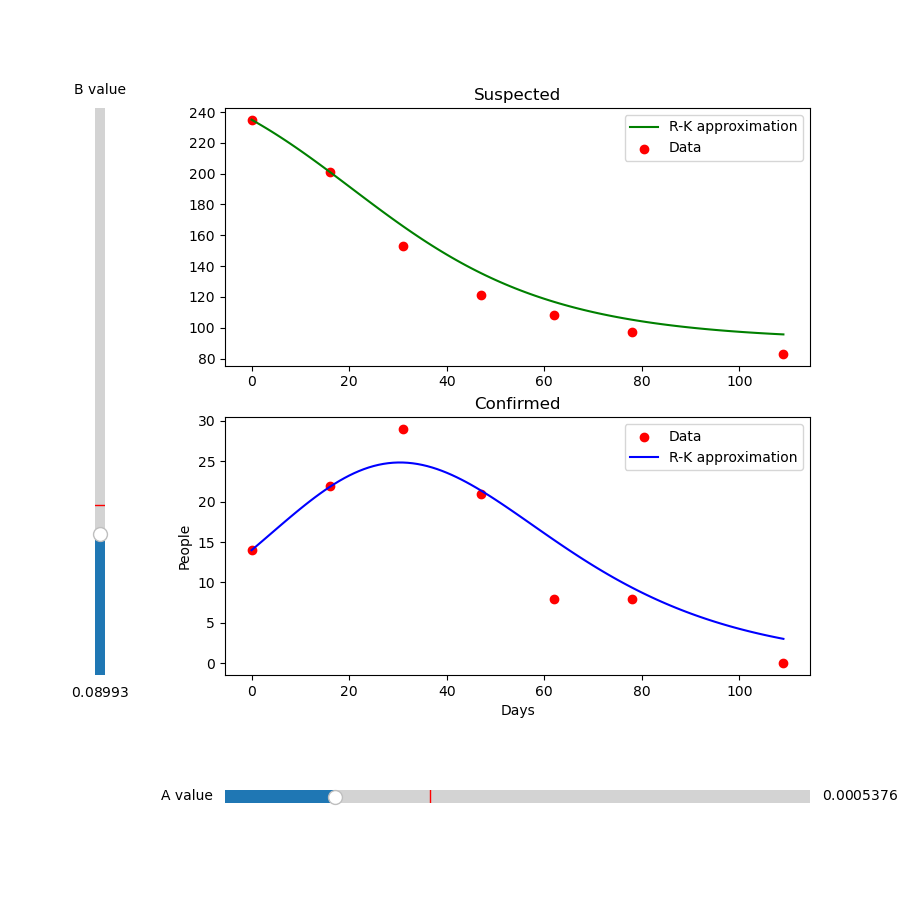

0

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from ipywidgets import interact, interactive, widgets, fixed, interact_manual
try:
    from ipywidgets import Layout
except:
    pass 
step = 1
yvector = []
evector = []
tvector = []
paramvector = [0.00057,0.0905]

figure, axis = plt.subplots(2, 1,figsize=(9,9))
plt.subplots_adjust(left=0.25, bottom=0.25)

def update2(val):
    paramvector[1] = val
    RungeKutta(paramvector)
    line2.set_ydata(evector)
    figure.canvas.draw_idle()
    
def update(val):
    paramvector[0] = val
    RungeKutta(paramvector)
    line1.set_ydata(yvector)
    line2.set_ydata(evector)
    figure.canvas.draw_idle()

def RungeKutta(variables):
    yvector.clear()
    evector.clear()
    tvector.clear()
    yvector.append(235.0)
    evector.append(14.0)
    tvector.append(0.0)
    for i in range(0,109):
        k0 = step*fun_y(variables[0],yvector[i],evector[i])
        l0 = step*fun_e(variables[0],yvector[i],evector[i],variables[1])
        m0 = step*fun_t(variables[1],evector[i])
    
        k1 = step*fun_y(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0)) 
        l1 = step*fun_e(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0),variables[1])
        m1 = step*fun_t(variables[1],evector[i] + (l0/2.0))
    
        k2 = step*fun_y(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0)) 
        l2 = step*fun_e(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0),variables[1])
        m2 = step*fun_t(variables[1],evector[i] + (l1/2.0))
    
        k3 = step*fun_y(variables[0],yvector[i] + k2, evector[i] + l2) 
        l3 = step*fun_e(variables[0],yvector[i] + k2, evector[i] + l2,variables[1])
        m3 = step*fun_t(variables[1],evector[i] + l2)

        ynext = yvector[i] + (1/6.0) * (k0 + 2*k1 + 2*k2 + k3)
        enext = evector[i] + (1/6.0) * (l0 + 2*l1 + 2*l2 + l3)
        tnext = tvector[i] + (1/6.0) * (m0 + 2*m1 + 2*m2 + m3)
        yvector.append(ynext)
        evector.append(enext)
        tvector.append(tnext)



RungeKutta(paramvector)

rrl = np.arange(0,110)
    


plt.xlabel("Days")
plt.ylabel("People")
line1, = axis[0].plot(rrl,np.array(yvector),"green",label = "R-K approximation")
axis[0].scatter(daysvector, ypopta, c='r', label = "Data")
axis[0].set_title("Suspected")
axis[0].legend()

axis[1].scatter(daysvector, epivevaiwmena, c='r', label = "Data")
line2, = axis[1].plot(rrl,np.array(evector),"blue", label = "R-K approximation")
axis[1].set_title("Confirmed")
axis[1].legend()


ax_a = plt.axes([0.25, 0.1, 0.65, 0.03])
    
A_slider = Slider(
    ax=ax_a,
    label='A value',
    valmin=0.00050,
    valmax=0.00070,
    valinit=0.00057,
    )
ax_b = plt.axes([0.1, 0.25, 0.0225, 0.63])
B_slider = Slider(
    ax=ax_b,
    label='B value',
    valmin=0.08,
    valmax=0.12,
    valinit=0.0920,
    orientation = 'vertical'
    )
A_slider.on_changed(update)
B_slider.on_changed(update2)

Τρέχοντας το ολοκληρωμένο πρόγραμμα βελτιστοποίησης, έχουμε:

<IPython.core.display.Javascript object>


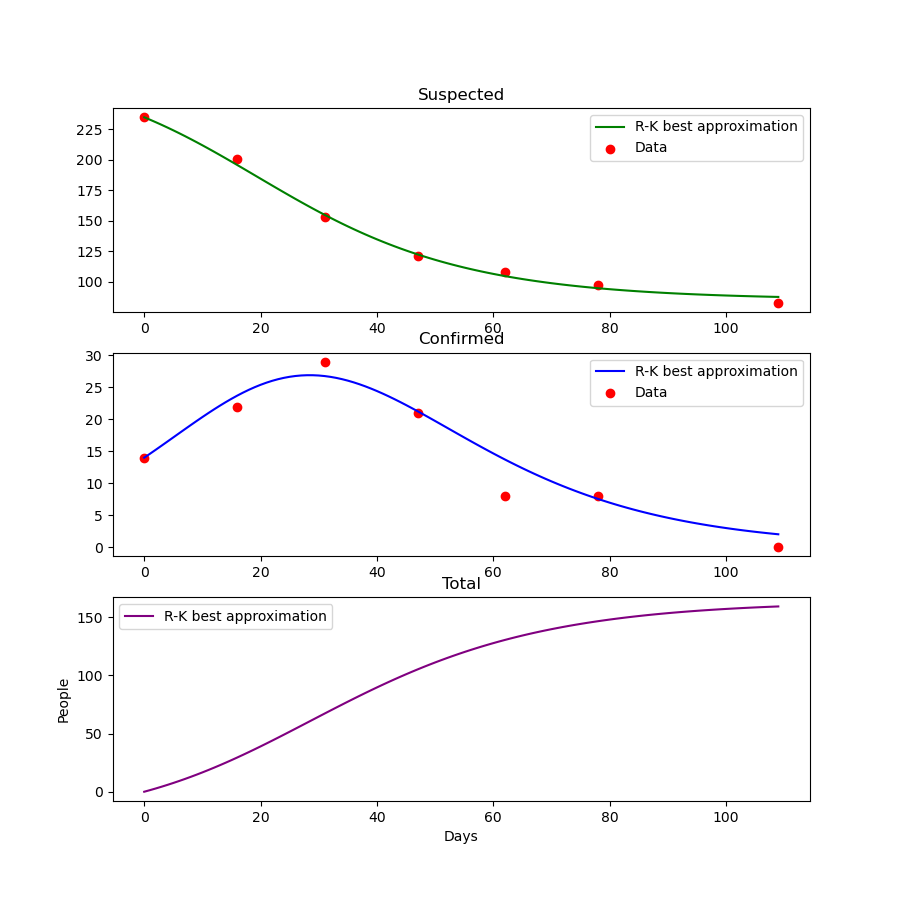

Best solution found for a = 0.0005991104320582176 and b = 0.09677445392850485


Approximated Data:

Day		Suspected	Confirmed	Total

 0		235			14			0

 16		196			24			29

 31		155			27			67

 47		123			21			105

 62		105			14			131

 78		95			8			147

 109		88			2			159


Real Data:

Day		Suspected	Confirmed

 0		235			14

 16		201			22

 31		153			29

 47		121			21

 62		108			8

 78		97			8

 109		83			0


In [5]:
from scipy.optimize import least_squares
import numpy as np 
from matplotlib import pyplot as plt 


step = 1
yvector = []
evector = []
tvector = []

dayslist = [0,16,31,47,62,78,109]
daysvector = np.array(dayslist)
ypoptalist = [235,201,153,121,108,97,83]
ypopta = np.array(ypoptalist)
epivevaiwmenalist = [14,22,29,21,8,8,0]
epivevaiwmena = np.array(epivevaiwmenalist)

figure, axis = plt.subplots(3, 1,figsize=(9,9))


fun_y = lambda a,y,e : -a*y*e 
fun_e = lambda a,y,e,b: a*y*e-b*e
fun_t = lambda b,e : b*e


def main():
    x0_rosenbrock = np.array([0.00057,0.0905])
    res_1 = least_squares(fun_rosenbrock, x0_rosenbrock)
    plotData()
    print("Best solution found for a = {} and b = {}\n\n".format(res_1.x[0],res_1.x[1]))
    
    print("Approximated Data:\n")
    print("Day\t\tSuspected\tConfirmed\tTotal")
    
    for i in dayslist:
        print("\n {}\t\t{}\t\t\t{}\t\t\t{}".format(i,round(yvector[i]), round(evector[i]), round(tvector[i])))
        
    print("\n\nReal Data:\n")
    print("Day\t\tSuspected\tConfirmed")
    for i in range(0,7):
        print("\n {}\t\t{}\t\t\t{}".format(dayslist[i],round(ypoptalist[i]), round(epivevaiwmenalist[i])))

plt.show()

plt.show()
    
def fun_rosenbrock(x):
    RungeKutta(x)
    return calculateErrorVector() 
    
def RungeKutta(variables):
    yvector.clear()
    evector.clear()
    tvector.clear()
    yvector.append(235.0)
    evector.append(14.0)
    tvector.append(0.0)
    for i in range(0,109):
        k0 = step*fun_y(variables[0],yvector[i],evector[i])
        l0 = step*fun_e(variables[0],yvector[i],evector[i],variables[1])
        m0 = step*fun_t(variables[1],evector[i])
    
        k1 = step*fun_y(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0)) 
        l1 = step*fun_e(variables[0],yvector[i] + (k0/2.0), evector[i]+ (l0/2.0),variables[1])
        m1 = step*fun_t(variables[1],evector[i] + (l0/2.0))
    
        k2 = step*fun_y(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0)) 
        l2 = step*fun_e(variables[0],yvector[i] + (k1/2.0), evector[i] + (l1/2.0),variables[1])
        m2 = step*fun_t(variables[1],evector[i] + (l1/2.0))
    
        k3 = step*fun_y(variables[0],yvector[i] + k2, evector[i] + l2) 
        l3 = step*fun_e(variables[0],yvector[i] + k2, evector[i] + l2,variables[1])
        m3 = step*fun_t(variables[1],evector[i] + l2)

        ynext = yvector[i] + (1/6.0) * (k0 + 2*k1 + 2*k2 + k3)
        enext = evector[i] + (1/6.0) * (l0 + 2*l1 + 2*l2 + l3)
        tnext = tvector[i] + (1/6.0) * (m0 + 2*m1 + 2*m2 + m3)
        yvector.append(ynext)
        evector.append(enext)
        tvector.append(tnext)
        
        
        
def calculateErrorVector():
    errorvec = []
    errorvec.clear()
    k = 0
    for i in dayslist:
        errorvec.append(ypoptalist[k]-yvector[i])
        k+=1
    k = 0
    for i in dayslist:
        errorvec.append(epivevaiwmenalist[k]-evector[i])
        k += 1
    return errorvec



def plotData():
    
    rrl = np.arange(0,110)
    

    
  
    plt.xlabel("Days")
    plt.ylabel("People")
    
    axis[0].plot(rrl,np.array(yvector),"green", label = 'R-K best approximation')
    axis[0].scatter(daysvector, ypopta, c='r', label = 'Data')
    axis[0].set_title("Suspected")
    axis[0].legend()
  
    axis[1].plot(rrl,np.array(evector),"blue", label = 'R-K best approximation')
    axis[1].scatter(daysvector, epivevaiwmena, c='r', label = 'Data')
    axis[1].set_title("Confirmed")
    axis[1].legend()
    
    axis[2].plot(rrl,np.array(tvector),"purple", label = 'R-K best approximation')
    axis[2].set_title("Total")
    axis[2].legend()
    
    plt.show()
    

    
if __name__ == "__main__":
    main()

Όπως φαίνεται και στο output του προγράμματος, οι βέλτιστες τιμές που βρέθηκαν ειναι οι:

α = 0.0005991104320582176, β = 0.09677445392850485

Το τελικό plot και οι πίνακες τιμών μας δίνουν μια ιδέα για την ακρίβεια.

Πιστεύουμε ότι οι τελικές προσεγγιστικές τιμές είναι ικανοποιητικά κοντά στις πραγματικές.